In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import math

1. Реализовать критерии Крамера-фон Мизеса определяя p-value с помощью
метода Монте-Карло. Построить график ЭФР p-value при верной гипотезе и проверить, что критерий
работает верно. 

In [36]:
def KFM(X):#X здесь это F0(X)
	X=np.sort(X)
	result=1/12/len(X)
	for i in range(len(X)):
		result+=((2*i-1)/2/len(X)-X[i])**2
	return result

In [37]:
def counter(t,T):
	for i in range(10000):
		if t>T[9999-i]:
			return i/10000

In [38]:
T=np.zeros(10000)
for i in range(10000):
	T[i]=KFM(np.random.uniform(size=1000,low=0,high=1))
T=np.sort(T)

[0.0132642  0.01353579 0.01354463 ... 1.57176735 1.61254397 1.91548949]


<Axes: ylabel='Count'>

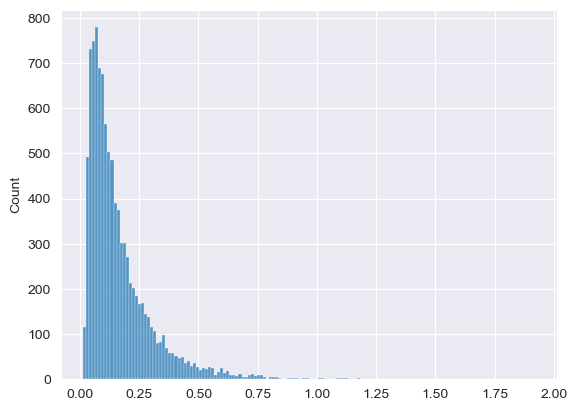

In [39]:
print(T)
sns.histplot(T)

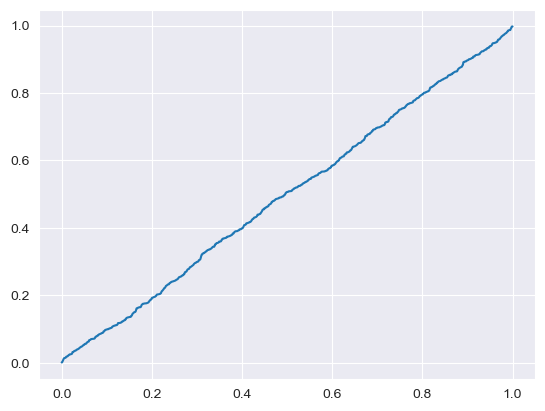

In [40]:
t=np.zeros(1000)
for i in range(1000):
	X=st.norm.cdf(np.random.normal(size=1000,loc=0,scale=1))
	t[i]=counter(KFM(X),T)
t=np.sort(t)
plt.plot(np.linspace(0,1,1000),t)

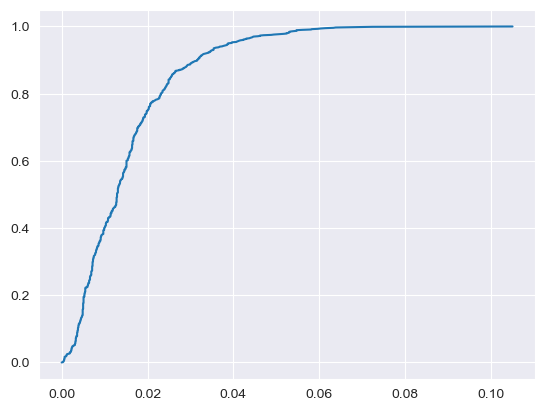

In [43]:
t=np.zeros(1000)
for i in range(1000):
	X=st.laplace.cdf(np.random.normal(size=1000,loc=0,scale=1))
	t[i]=counter(KFM(X),T)
t=np.sort(t)
plt.plot(t,np.linspace(0,1,1000))

2. Построить графики p-value критериев Колмогорова, хи-квадрат, Крамера-фон Мизеса для проверки гипотезы H0 : Xi ∼ N (0, 1) для Xi ∼ pN (0, 1) + (1 − p)N (0, 3) (под суммой имеется ввиду смесь),p = 0.9. Подобрать n так, чтобы все критерии были чувствительны к гипотезе (то есть график p-value существенно отличался от биссектрисы, но не становился вертикальным). Какой критерий лучше справляется с задачей?

In [48]:
n=1000
siz=round(n**0.2)
pk=np.zeros(1000)
pchisq=np.zeros(1000)
pkfm=np.zeros(1000)
for i in range(1000):
	X1=np.random.normal(size=n,loc=0,scale=1)
	X3=np.random.normal(size=n,loc=0,scale=3)
	Y=np.random.binomial(size=n,n=1,p=0.9)
	X=X1*Y+X3*(1-Y)
	
	pk[i]=st.kstest(X,st.norm.cdf,alternative='two-sided').pvalue
	quant=np.zeros(siz+1)
	rq=np.zeros(siz)
	for j in range(siz+1):
		quant[j]=st.norm.ppf(j/siz)
	for j in range(n):
		for k in range(siz):
			if quant[k]<X[j]<=quant[k+1]:
				rq[k]+=1
				continue
	chisqstat=0
	for j in range(siz):
		chisqstat+=(rq[j]-n/siz)**2/(n/siz)
	pchisq[i]=1-st.chi2.cdf(chisqstat,df=siz-1)
	
	Y=st.norm.cdf(X)
	pkfm[i]=counter(KFM(Y),T)

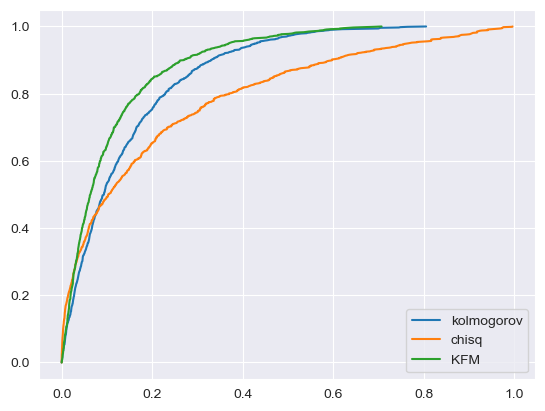

In [49]:
plt.plot(np.sort(pk),np.linspace(0,1,1000),label='kolmogorov')
plt.plot(np.sort(pchisq),np.linspace(0,1,1000),label='chisq')
plt.plot(np.sort(pkfm),np.linspace(0,1,1000),label='KFM')
plt.legend()